In [1]:
import findspark
findspark.init()

In [2]:
import pyspark
import os

In [3]:
conf = pyspark.SparkConf()
sc = pyspark.SparkContext(conf=conf)
print(sc._conf.getAll())

[('spark.driver.port', '54994'), ('spark.driver.memory', '12g'), ('spark.app.startTime', '1700888341002'), ('spark.app.id', 'local-1700888342737'), ('spark.executor.id', 'driver'), ('spark.app.name', 'pyspark-shell'), ('spark.executor.memory', '12g'), ('spark.executor.heartbeatInterval', '10000000'), ('spark.driver.host', 'PLPhu'), ('spark.driver.extraJavaOptions', '-Djava.net.preferIPv6Addresses=false -XX:+IgnoreUnrecognizedVMOptions --add-opens=java.base/java.lang=ALL-UNNAMED --add-opens=java.base/java.lang.invoke=ALL-UNNAMED --add-opens=java.base/java.lang.reflect=ALL-UNNAMED --add-opens=java.base/java.io=ALL-UNNAMED --add-opens=java.base/java.net=ALL-UNNAMED --add-opens=java.base/java.nio=ALL-UNNAMED --add-opens=java.base/java.util=ALL-UNNAMED --add-opens=java.base/java.util.concurrent=ALL-UNNAMED --add-opens=java.base/java.util.concurrent.atomic=ALL-UNNAMED --add-opens=java.base/sun.nio.ch=ALL-UNNAMED --add-opens=java.base/sun.nio.cs=ALL-UNNAMED --add-opens=java.base/sun.security.

In [4]:
from pyspark.sql import *

### Tạo graph

In [5]:
from graphframes import *

In [6]:
spark = SparkSession(sc)

In [7]:
vertices = spark.createDataFrame([('1', 'Carter', 50),
                                  ('2', 'May', 26),
                                 ('3', 'Mills', 80),
                                  ('4', 'Hood', 65),
                                  ('5', 'Banks', 93),
                                 ('98', 'Berg', 28),
                                 ('99', 'Page', 16)],
                                 ['id', 'name', 'age'])
edges = spark.createDataFrame([('1', '2', 'friend'),
                               ('1', '98', 'friend'),
                               ('2', '1', 'friend'),
                              ('3', '1', 'friend'),
                              ('1', '3', 'friend'),
                               ('2', '3', 'follows'),
                               ('3', '4', 'friend'),
                               ('4', '3', 'friend'),
                               ('5', '3', 'friend'),
                               ('3', '5', 'friend'),
                               ('4', '5', 'follows'),
                              ('98', '99', 'friend'),
                              ('99', '98', 'friend')],
                              ['src', 'dst', 'type'])

In [8]:
g = GraphFrame(vertices, edges)

C:\spark\spark-3.5.0-bin-hadoop3\python\pyspark\sql\dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


In [9]:
g.vertices.show()

+---+------+---+
| id|  name|age|
+---+------+---+
|  1|Carter| 50|
|  2|   May| 26|
|  3| Mills| 80|
|  4|  Hood| 65|
|  5| Banks| 93|
| 98|  Berg| 28|
| 99|  Page| 16|
+---+------+---+



In [10]:
g.edges.show()

+---+---+-------+
|src|dst|   type|
+---+---+-------+
|  1|  2| friend|
|  1| 98| friend|
|  2|  1| friend|
|  3|  1| friend|
|  1|  3| friend|
|  2|  3|follows|
|  3|  4| friend|
|  4|  3| friend|
|  5|  3| friend|
|  3|  5| friend|
|  4|  5|follows|
| 98| 99| friend|
| 99| 98| friend|
+---+---+-------+



In [11]:
g.degrees.show()

C:\spark\spark-3.5.0-bin-hadoop3\python\pyspark\sql\dataframe.py:147: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


+---+------+
| id|degree|
+---+------+
|  1|     5|
|  2|     3|
| 98|     3|
|  3|     7|
|  4|     3|
|  5|     3|
| 99|     2|
+---+------+



In [13]:
g.inDegrees.show()

+---+--------+
| id|inDegree|
+---+--------+
|  2|       1|
| 98|       2|
|  1|       2|
|  3|       4|
|  4|       1|
|  5|       2|
| 99|       1|
+---+--------+



In [14]:
g.outDegrees.show()

+---+---------+
| id|outDegree|
+---+---------+
|  1|        3|
|  2|        2|
|  3|        3|
|  4|        2|
|  5|        1|
| 98|        1|
| 99|        1|
+---+---------+



In [15]:
import networkx as nx
import matplotlib.pyplot as plt

In [16]:
def PlotGraph(edge_list):
    Gplot=nx.Graph()
    for row in edge_list.select('src','dst').take(100):
        Gplot.add_edge(row['src'],row['dst'])

    nx.draw(Gplot, with_labels=True, font_weight='bold')


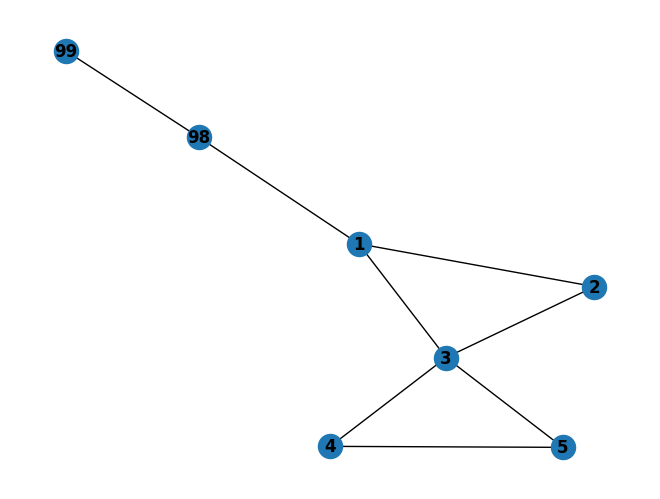

In [17]:
PlotGraph(g.edges)

In [ ]:
# note: nếu bị lỗi AttributeError: module 'matplotlib.cbook' has no attribute 'iterable'
# thì Downgrade matplotlib version to 2.2.3: pip install matplotlib==2.2.3

In [18]:
g.vertices.filter("age > 30").show()


+---+------+---+
| id|  name|age|
+---+------+---+
|  1|Carter| 50|
|  3| Mills| 80|
|  4|  Hood| 65|
|  5| Banks| 93|
+---+------+---+



In [20]:
g.inDegrees.filter("inDegree >= 2")\
                    .sort("inDegree", ascending=False)\
                    .show()


+---+--------+
| id|inDegree|
+---+--------+
|  3|       4|
| 98|       2|
|  1|       2|
|  5|       2|
+---+--------+



In [21]:
g.edges.filter('type == "friend"').show()

+---+---+------+
|src|dst|  type|
+---+---+------+
|  1|  2|friend|
|  1| 98|friend|
|  2|  1|friend|
|  3|  1|friend|
|  1|  3|friend|
|  3|  4|friend|
|  4|  3|friend|
|  5|  3|friend|
|  3|  5|friend|
| 98| 99|friend|
| 99| 98|friend|
+---+---+------+



In [22]:
sc.setCheckpointDir('graphframes_cps')

In [23]:
g.connectedComponents().show()

+---+------+---+---------+
| id|  name|age|component|
+---+------+---+---------+
|  1|Carter| 50|        0|
|  2|   May| 26|        0|
|  3| Mills| 80|        0|
|  4|  Hood| 65|        0|
|  5| Banks| 93|        0|
| 98|  Berg| 28|        0|
| 99|  Page| 16|        0|
+---+------+---+---------+



In [24]:
# Chỉ có 1 component trong đồ thị

In [25]:
mutualFriends = g.find("(a)-[]->(b); (b)-[]->(c); (c)-[]->(b); (b)-[]->(a)").dropDuplicates()

In [26]:
mutualFriends.show()

+---------------+---------------+---------------+
|              a|              b|              c|
+---------------+---------------+---------------+
|{1, Carter, 50}|   {2, May, 26}|{1, Carter, 50}|
| {5, Banks, 93}| {3, Mills, 80}|{1, Carter, 50}|
| {5, Banks, 93}| {3, Mills, 80}| {5, Banks, 93}|
| {98, Berg, 28}| {99, Page, 16}| {98, Berg, 28}|
|{1, Carter, 50}| {3, Mills, 80}|{1, Carter, 50}|
|   {2, May, 26}|{1, Carter, 50}| {3, Mills, 80}|
|  {4, Hood, 65}| {3, Mills, 80}|{1, Carter, 50}|
|   {2, May, 26}|{1, Carter, 50}|   {2, May, 26}|
| {3, Mills, 80}|  {4, Hood, 65}| {3, Mills, 80}|
| {3, Mills, 80}| {5, Banks, 93}| {3, Mills, 80}|
|  {4, Hood, 65}| {3, Mills, 80}|  {4, Hood, 65}|
| {3, Mills, 80}|{1, Carter, 50}| {3, Mills, 80}|
|  {4, Hood, 65}| {3, Mills, 80}| {5, Banks, 93}|
|{1, Carter, 50}| {3, Mills, 80}| {5, Banks, 93}|
| {5, Banks, 93}| {3, Mills, 80}|  {4, Hood, 65}|
| {3, Mills, 80}|{1, Carter, 50}|   {2, May, 26}|
|{1, Carter, 50}| {3, Mills, 80}|  {4, Hood, 65}|


In [27]:
mutualFriends.filter('a.id == 2 and c.id == 3').show()

+------------+---------------+--------------+
|           a|              b|             c|
+------------+---------------+--------------+
|{2, May, 26}|{1, Carter, 50}|{3, Mills, 80}|
+------------+---------------+--------------+



In [28]:
g.triangleCount().show()

+-----+---+------+---+
|count| id|  name|age|
+-----+---+------+---+
|    1|  1|Carter| 50|
|    1|  2|   May| 26|
|    2|  3| Mills| 80|
|    1|  4|  Hood| 65|
|    1|  5| Banks| 93|
|    0| 98|  Berg| 28|
|    0| 99|  Page| 16|
+-----+---+------+---+



In [29]:
pr = g.pageRank(resetProbability=0.15, tol=0.01)

C:\spark\spark-3.5.0-bin-hadoop3\python\pyspark\sql\dataframe.py:168: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(


In [30]:
pr.vertices.show()

+---+------+---+------------------+
| id|  name|age|          pagerank|
+---+------+---+------------------+
|  1|Carter| 50|0.6799541646597174|
|  2|   May| 26|0.3505290564027432|
|  3| Mills| 80| 1.360269120202177|
|  4|  Hood| 65|0.5442781769957595|
|  5| Banks| 93|0.7695218034237804|
| 98|  Berg| 28| 1.693795983443179|
| 99|  Page| 16|1.6016516948726431|
+---+------+---+------------------+



In [31]:
pr.edges.show() 

+---+---+-------+------------------+
|src|dst|   type|            weight|
+---+---+-------+------------------+
|  1|  2| friend|0.3333333333333333|
|  1|  3| friend|0.3333333333333333|
|  1| 98| friend|0.3333333333333333|
|  2|  1| friend|               0.5|
|  2|  3|follows|               0.5|
|  3|  1| friend|0.3333333333333333|
|  3|  4| friend|0.3333333333333333|
|  3|  5| friend|0.3333333333333333|
|  4|  3| friend|               0.5|
|  4|  5|follows|               0.5|
|  5|  3| friend|               1.0|
| 98| 99| friend|               1.0|
| 99| 98| friend|               1.0|
+---+---+-------+------------------+

